# Introduction to Graphs

Graph problems pervade computer science, and algorithms for working with them are fundamental to the field. Hundreds of interesting computational problems are couched in terms of graphs. These notes will touch on a few of the more significant problems involving graphs.

The **Breadth-first Search** algorithm is one of the simplest algorithms for searching a graph and the archetype for many important graph algorithms. Prim's minimum spanning tree algorithm and Dijkstra's single-source shortest-path algorithm use ideas similar to those in breadth-first search.

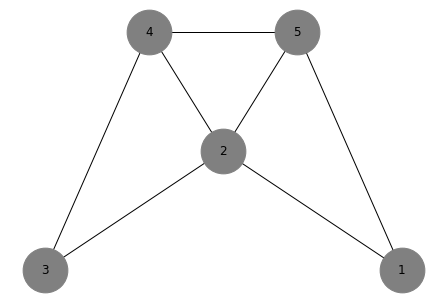

In [8]:
import networkx as nx
import numpy as np

G = nx.from_dict_of_lists({1: [2, 5], 2: [1, 5, 3, 4], 3: [2, 4], 4: [2, 3, 5], 5: [1, 2, 4]})
nx.draw_spectral(G, node_color='grey', edge_color='black', with_labels=True, node_size=2000)

## Representations of graphs

We can choose between two standard ways to represent a graph $G$
$$
G = (V, E)
$$

The **adjacency-list representation** of a graph consist of an array, `Adj` of $|V|$ lists, one for each vertex in $V$.

In [14]:
nx.to_dict_of_lists(G)

{1: [2, 5], 2: [1, 5, 3, 4], 3: [2, 4], 4: [2, 3, 5], 5: [1, 2, 4]}

The **adjacency-matrix representation** of a graph consist of a matrix $|V| \times |V|$ matrix $A$ where each $A_{ij}$ assumes the value of $1$ if there exists an edge from vertex $i$ to vertex $j$ and $A_{ij}$ assumes the value of $0$ if there does not exist an edge from vertex $i$ to vertex $j$.

In [13]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 0., 0., 1.],
        [1., 0., 1., 1., 1.],
        [0., 1., 0., 1., 0.],
        [0., 1., 1., 0., 1.],
        [1., 1., 0., 1., 0.]])

We can readily adapt adjacency lists to represent **weighted graphs**, that is, graphs for which each edge has an associated **weight**, typically given by a weight function $w : E \to \mathbb{R}$. Most algorithms that operate on graphs need to maintain attributes for vertices and/or edges. We indicate these attribtues using our usual notation, such as $v.d$ for an attribute $d$ of vertex $v$. Similarly, attributes of edges are indicated by $(u,v).f$ for the attribute $f$ of the edge connecting $u$ to $v$.

## Breadth-first Search

Given some $G = (V, E)$ and a distinguished **source** $s \in V$, Breadth-first Search systematically explores the edges of $G$ to "discover" every vertex that is reachable from $s$. It computes the smallest number of edges (distance) from $s$ to any node reachable from $s$ and produces a "breadth-first tree" with root $s$ that contains all reachable vertices. For any vertex $v$ reachable from $s$, the simple path in this tree from $s$ to $v$ cooresponds to the "shortest path" from $s$ to $v$ in $G$.

`BFS` constructs a breadth-tree, initially with only its root $s$. Whenever the search discovers the white vertex $v$ in the course of scanning the adjacency list of analready discovered vertex $u$, the vertex $(u, v)$ is added to the breadth-tree and we say that $u$ is the **predecessor** or **parent** of $v$. The following breadth-first-search procedure `BFS` assumes that the input graph $G$ is represented using adjacency lists.
```
BFS(G, s):
    for vertex in G.V - {s}:
        vertex.color = "white"
        vertex.distance = -1
        vertex.parent = None
    s.color = "gray"
    s.distance = 0
    s.parent = None
    Q = []
    Q.append(s)
    while Q != []:
        u = Q.pop(0)
        for vertex in u.Adj:
            if vertex.color == "white":
                vertex.color = "gray"
                vertex.distance = u.distance + 1
                vertex.parent = u
                Q.append(vertex)
        u.color = "black"

```

In [29]:
color = lambda x: 

def BFS(G, s):
    for vertex in nx.nodes(G):
        nx.set_node_attributes(G, {vertex: "white"}, name="color")
        nx.set_node_attributes(G, {vertex: -1}, name="distance")
        nx.set_node_attributes(G, {vertex: -1}, name="parent")
    nx.set_node_attributes(G, {s: "gray"}, name="color")
    nx.set_node_attributes(G, {s: 0}, name="distance")
    nx.set_node_attributes(G, {s: -1}, name="parent")
    Q = []
    Q.append(s)
    while Q != []:
        u = Q.pop(0)
        parent_distance = nx.get_node_attributes(G, "distance")[u]
        for vertex in nx.all_neighbors(G, u):
            neighbor_color = nx.get_node_attributes(G, "color")[vertex]
            if neighbor_color == "white":
                nx.set_node_attributes(G, {vertex: "gray"}, name="color")
                nx.set_node_attributes(G, {vertex: parent_distance+1}, name="distance")
                nx.set_node_attributes(G, {vertex: u}, name="parent")
                Q.append(vertex)
        nx.set_node_attributes(G, {u: "black"}, name="color")
  
BFS(G, 1)

The following procedure prints out the vertices on a shortest path from $s$ to $v$, assuming that `BFS` has already computed a breadth-first search.

In [37]:
def Print_Path(G, s, v):
    if v == s: 
        print(s)
    elif nx.get_node_attributes(G, "parent")[v] == -1:
        print(f"no path from {s} to {v} exists")
    else:
        Print_Path(G, s, nx.get_node_attributes(G, "parent")[v])
        print(v)
        
Print_Path(G, 1, 5)

1
5


## Depth-first Search